<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/9_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Concept

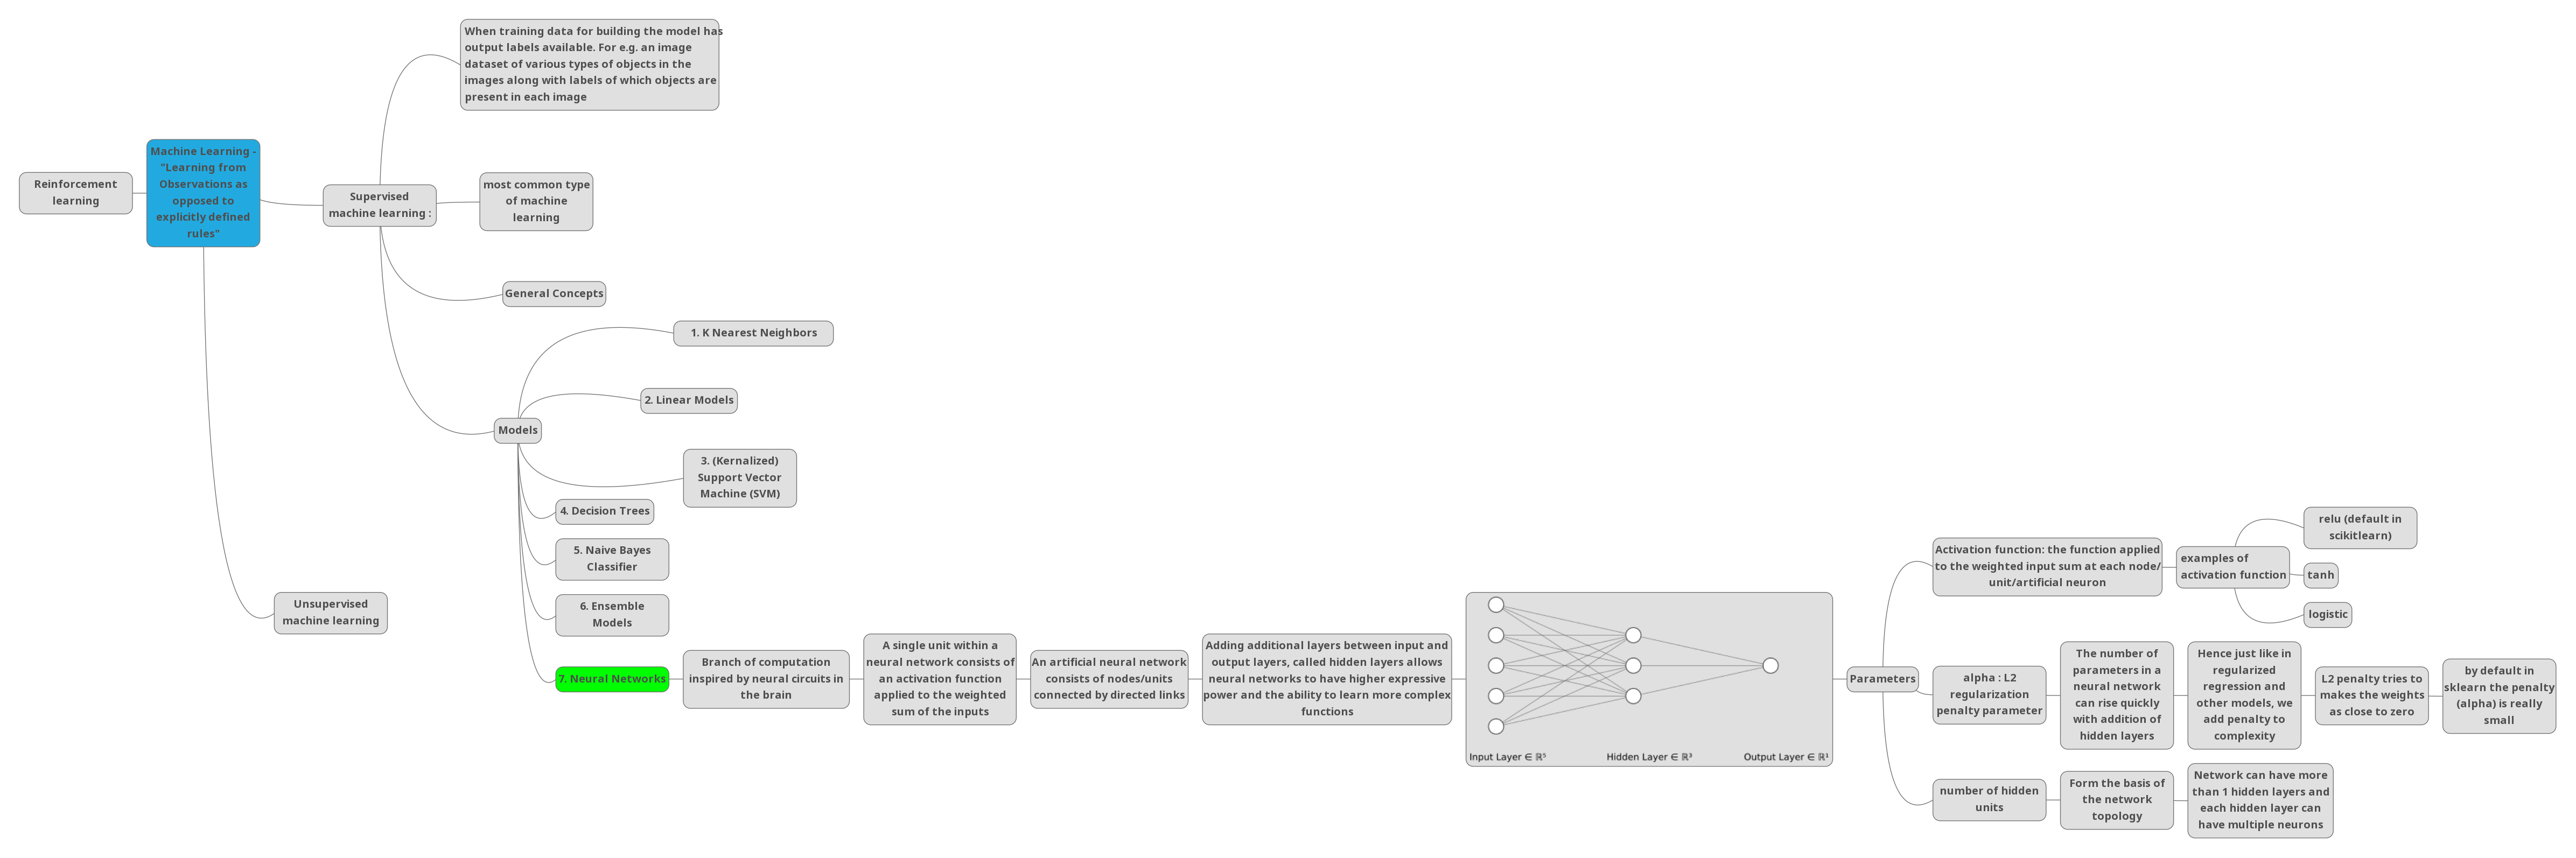

## Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs,load_breast_cancer,make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!cp '/content/drive/My Drive/Colab Notebooks/MLWithPython/ADSPYCourseStuff/adspy_shared_utilities.py' .

In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot,plot_class_regions_for_classifier

## Activation functions

Text(0, 0.5, 'Activation function value')

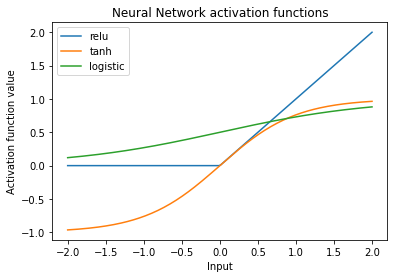

In [ ]:
plt.plot(figsize = (10,6))

x = np.linspace(-2,2,200)

plt.plot(x,np.maximum(0,x),label='relu')
plt.plot(x,np.tanh(x),label='tanh')
plt.plot(x,1/(1+np.exp(-x)),label='logistic')
plt.legend()
plt.title('Neural Network activation functions')
plt.xlabel('Input')
plt.ylabel('Activation function value')

## Case Studies

### Classification

#### Synthetic Nonlinearly separable dataset

In [ ]:
X_D2,y_D2 = make_blobs(
    n_samples=100,
    n_features=2,
    centers = 8,
    cluster_std = 1.3,
    random_state = 4
)

In [ ]:
np.unique(y_D2)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
y_D2= y_D2 % 2

Text(0.5, 1.0, 'Non linearly separable synthetic data')

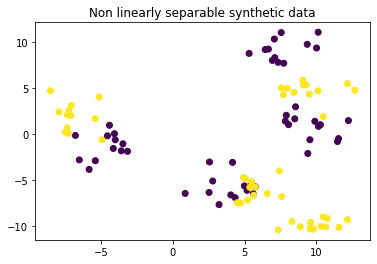

In [ ]:
plt.scatter(X_D2[:,0],X_D2[:,1],c=y_D2)
plt.title('Non linearly separable synthetic data')


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
    X_D2,
    y_D2,
    random_state = 0
)

##### Single hidden layer with varying units

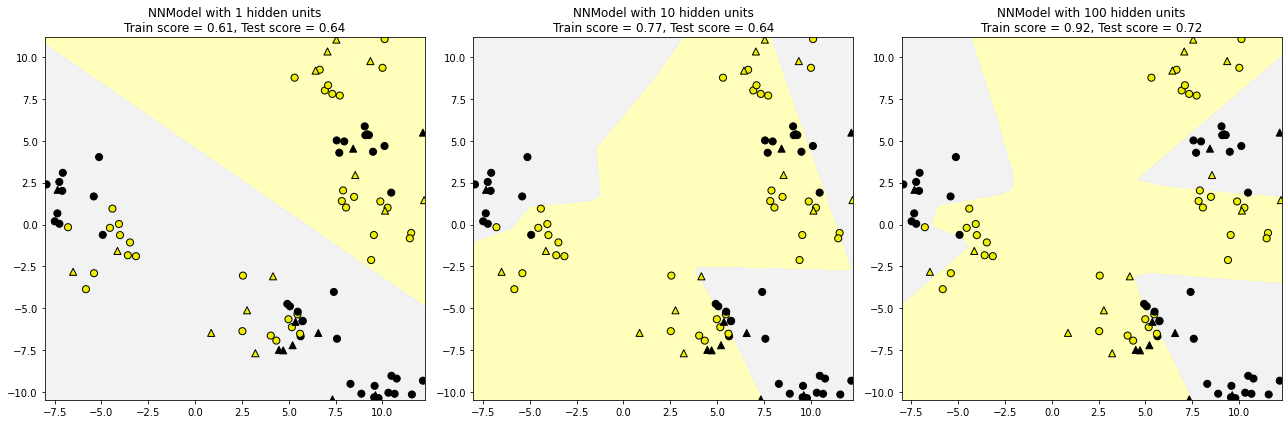

In [ ]:
fig,subaxes = plt.subplots(1,3,figsize=(18,6))
for hidden_layer_neurons,axis in zip([1,10,100],subaxes):
  NNmodel = MLPClassifier(hidden_layer_sizes=hidden_layer_neurons,
                          solver='lbfgs',
                          random_state=0).fit(X_train,y_train)

  title = 'NNModel with {} hidden units'.format(hidden_layer_neurons)
  plot_class_regions_for_classifier_subplot(NNmodel,
                                    X_train,
                                    y_train,
                                    X_test,
                                    y_test,
                                    title= title,
                                    subplot=axis)      
  plt.tight_layout()                
  

* Why lbfgs solver?

Increasing the number of units is helping in improving the model in this single hidden layer neural network model. 

We now look at adding more hidden layers

##### Two hidden layers

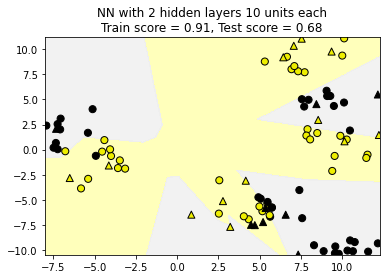

In [ ]:
NNmulthiddenlayers = MLPClassifier(hidden_layer_sizes=(10,10),
                                   solver='lbfgs',
                                   random_state=0).fit(X_train,y_train)
plot_class_regions_for_classifier(NNmulthiddenlayers,
                                  X_train,
                                  y_train,
                                  X_test,
                                  y_test,
                                  title='NN with 2 hidden layers 10 units each')

It is overfitting a bit hence we can do some regularization

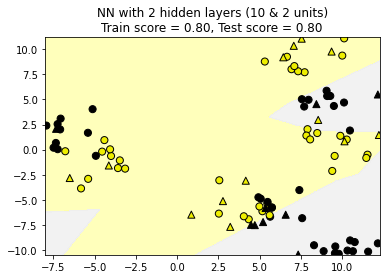

In [ ]:
NNmulthiddenlayers = MLPClassifier(hidden_layer_sizes=(10,2),
                                   solver='lbfgs',
                                   random_state=0).fit(X_train,y_train)
plot_class_regions_for_classifier(NNmulthiddenlayers,
                                  X_train,
                                  y_train,
                                  X_test,
                                  y_test,
                                  title='NN with 2 hidden layers (10 & 2 units)')

Much much better model. No disparity in training and test scores.


##### Effect of regularization

* 2 hidden layers - 100 units each
* Activation - tanh
* Regularization parameter values - [0.01, 0.1, 1, 5]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

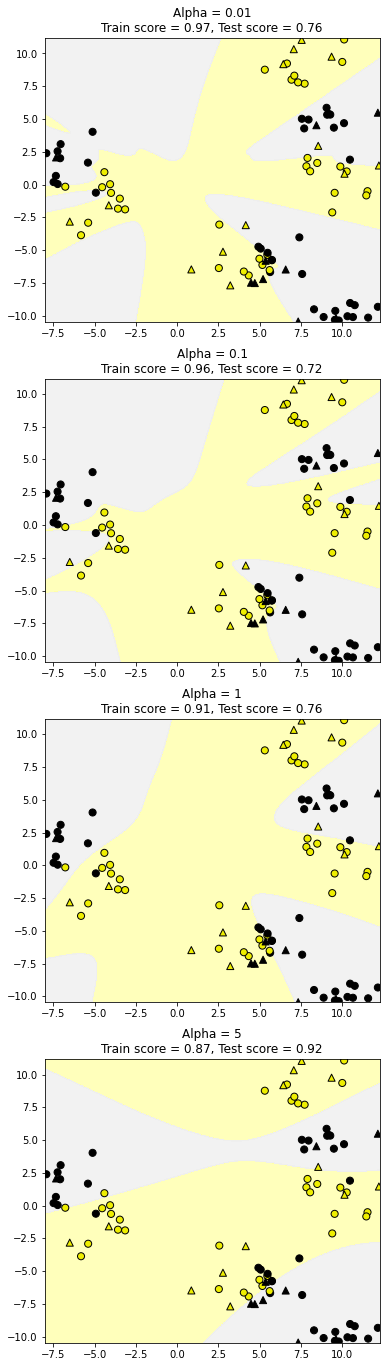

In [ ]:
fig,subaxes  = plt.subplots(4,1,figsize=(6,24))
alpha_values = [0.01,0.1,1,5]
for alpha_itn,axis in zip(alpha_values,subaxes):
  NNitn = MLPClassifier(hidden_layer_sizes=[100,100],
                        solver='lbfgs',
                        alpha=alpha_itn,
                        activation = 'tanh',
                        random_state=0).fit(X_train,y_train)
  plot_class_regions_for_classifier_subplot(NNitn,
                                            X_train,
                                            y_train,
                                            X_test,
                                            y_test,
                                            subplot=axis,
                                            title = 'Alpha = {}'.format(alpha_itn))
  

Higher regularization is creating nice and smooth decision boundaries with model also working much better on the validation dataset 

##### Effect of different activation functions 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


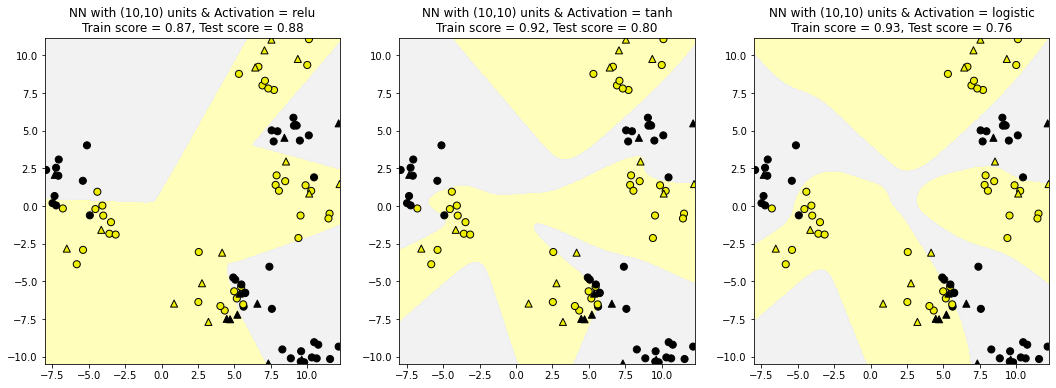

In [ ]:
act_fn = ['relu','tanh','logistic']
fig,axes = plt.subplots(1,3,figsize = (18,6))

for actfn_itn,axis in zip(act_fn,axes):
  NNitn = MLPClassifier(hidden_layer_sizes=(10,10),
                        solver='lbfgs',
                        activation=actfn_itn,
                        alpha = 0.1,
                        random_state=0).fit(X_train,y_train)
  plot_class_regions_for_classifier_subplot(NNitn,
                                            X_train,
                                            y_train,
                                            X_test,
                                            y_test,
                                            subplot=axis,
                                            title= 'NN with (10,10) units & Activation = {}'.format(actfn_itn))
  

#### Breast Cancer Dataset

In [ ]:
CancerData = load_breast_cancer()

In [ ]:
X_cancer = pd.DataFrame(CancerData.data,columns=CancerData.feature_names)

In [ ]:
y_cancer = pd.Series(CancerData.target,name='diagnosis')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
NNCancer = MLPClassifier(
    hidden_layer_sizes = (100,5),
    solver = 'lbfgs',
    activation='relu',
    random_state=0
)

In [ ]:
NNCancer.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print("NN Train Accuracy = {:.2f}".format(NNCancer.score(X_train_scaled,y_train)))

NN Train Accuracy = 1.00


In [ ]:
print("NN Test Accuracy = {:.2f}".format(NNCancer.score(X_test_scaled,y_test)))

NN Test Accuracy = 0.97


In [ ]:
print("Classification Report TestData: \n",classification_report(y_test,NNCancer.predict(X_test_scaled)))

Classification Report TestData: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



* Great recall score for class 0 (malignant tumours). 

### Regression

In [ ]:
X_R1,y_R1 = make_regression(
    n_samples=100,
    n_features=1,
    bias=150,
    noise=30,
    random_state=0
)

Text(0.5, 1.0, 'Synthetic regression dataset')

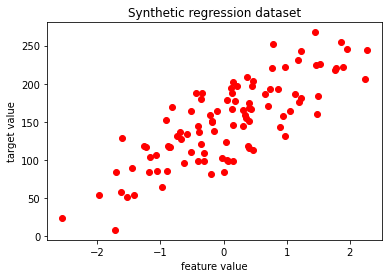

In [ ]:
plt.plot(X_R1,y_R1,'ro')
plt.xlabel('feature value')
plt.ylabel('target value')
plt.title('Synthetic regression dataset')

* Vary activation: relu,tanh
* Vary alpha: 0.0001,0.1,100

* Hidden layer size: [100,100]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

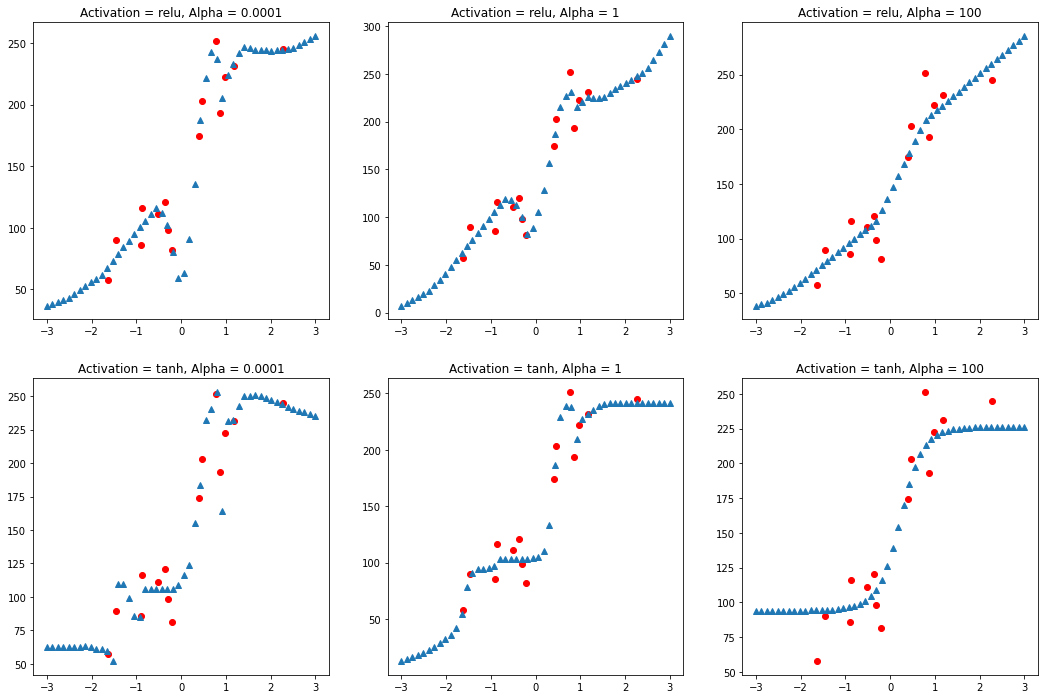

In [ ]:
plt.figure(figsize = (18,12))
X_train,X_test,y_train,y_test = train_test_split(
    X_R1[0::5],y_R1[0::5],random_state=0
)

newinp = np.linspace(-3,3,50)
ind = 1
for actfn in ['relu','tanh']:
  for alphaitn in [0.0001,1,100]:
    NNitn = MLPRegressor(
        activation = actfn,
        alpha=alphaitn,
        solver='lbfgs',
        hidden_layer_sizes=(100,100),
        random_state = 0
    ).fit(X_train,y_train)
    plt.subplot(2,3,ind)
    plt.plot(X_train,y_train,'ro')
    plt.plot(newinp.reshape(-1,1),NNitn.predict(newinp.reshape(-1,1)),'^')
    plt.title('Activation = {}, Alpha = {}'.format(actfn,alphaitn))
    ind += 1


* In this case, higher alpha is helping. 
* Also relu is better as an activation function as compared to tanh since tanh is saturating at the tails, while relu is nicely following the linear pattern that is in the dataset even at higher alpha. 